#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #7

### Problem 1 - LU Solver
(A)

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import scipy

In [367]:
U = np.asarray([[-5,2,0,-2,-3],[0,1,0,-5,4],[0,0,1,-1,1],[0,0,0,4,-2],[0,0,0,0,4]])
L = np.asarray([[1,0,0,0,0],[3,1,0,0,0],[0,2,1,0,0],[2,2,-4,1,0],[5,-4,-3,-2,1]])
b= np.asarray([2,-3,-3,2,3],float)

A = L.dot(U)
print('A = ',A)

A =  [[ -5   2   0  -2  -3]
 [-15   7   0 -11  -5]
 [  0   2   1 -11   9]
 [-10   6  -4  -6  -4]
 [-25   6  -3   5 -26]]


In [348]:
x = linalg.solve(A, b)
print(x)

[-27.5   28.25  14.75  38.25  38.5 ]


(B)

In [363]:
def BackSub(M,b):
    N = len(b)
    x = np.zeros_like(b,float)
    for i in range(N-1, -1, -1):
        temp = b[i]/M[i,i]
        for j in range(i+1, N):
            temp -= M[i,j]*x[j]/ M[i,i]
        x[i] = temp
    return(x)

def ForwardSub(M,b):
    N = len(b)
    x = np.zeros_like(b,float)
    for i in range(N):
        temp = b[i]/M[i,i]
        for j in range(i):
            temp -= M[i,j]*x[j]/M[i,i]
        x[i] = temp
    return(x)
    
    
def LUSolver(L,U,b):
    N = len(L)
    y = ForwardSub(L,b)
    x = BackSub(U,y)
    return(x)

In [364]:
LUSolver(L,U,b)

array([-27.5 ,  28.25,  14.75,  38.25,  38.5 ])

(C)

In [385]:
def Invert(L,U):
    N = len(L)
    A_inv = np.zeros((N,N))
    for i in range(N):
        delta = np.zeros((N,1))
        delta[i]= 1
        xi = LUSolver(L,U,delta)
        for j in range(N):
            A_inv[j,i] = xi[j]
    A_inv = np.asarray(A_inv)
    
    return(A_inv)

In [386]:
Invert(L,U)

array([[-10.15 ,   4.1  ,  -2.25 ,  -0.3  ,  -0.35 ],
       [ 10.625,  -3.25 ,   0.875,   0.5  ,  -0.375],
       [  5.875,  -1.75 ,   0.625,   0.   ,  -0.125],
       [ 14.125,  -5.25 ,   2.375,   0.5  ,   0.125],
       [ 14.25 ,  -5.5  ,   2.75 ,   0.5  ,   0.25 ]])

In [387]:
#Let's compare to the python result for the inverse:
linalg.inv(A)

array([[-1.01500000e+01,  4.10000000e+00, -2.25000000e+00,
        -3.00000000e-01, -3.50000000e-01],
       [ 1.06250000e+01, -3.25000000e+00,  8.75000000e-01,
         5.00000000e-01, -3.75000000e-01],
       [ 5.87500000e+00, -1.75000000e+00,  6.25000000e-01,
         7.24728919e-17, -1.25000000e-01],
       [ 1.41250000e+01, -5.25000000e+00,  2.37500000e+00,
         5.00000000e-01,  1.25000000e-01],
       [ 1.42500000e+01, -5.50000000e+00,  2.75000000e+00,
         5.00000000e-01,  2.50000000e-01]])

They match!

### Problem 2

(A) Exercise 6.1

For the junction at voltage V2:
$$ \frac{V_2 - V_1}{R} + \frac{V_2 - V_4}{R} +\frac{V_2 -0}{R} = 0$$

$$ \Rightarrow \boxed{3 V_2 - V_1 - V_4 = 0} $$

At V3:
$$ \frac{V_3-V_+}{R} +\frac{V_3 - V_1}{R} +\frac{V_3 -V_4}{R} = 0 $$

$$ \Rightarrow \boxed{3 V_3 - V_1 - V_4 = V_+} $$

And at V4:
$$ \frac{V_4-0}{R} +\frac{V_4 - V_1}{R} +\frac{V_4 -V_2}{R} +\frac{V_4 -V_3}{R}= 0 $$

$$ \Rightarrow \boxed{4 V_4 - V_1 - V_2 - V_3 = 0} $$

In addition to the given equation:
$$ \boxed{4V_1 -V_2-V_3-V_4=V_+} $$

we now have a system of four equations and 4 unknowns (since V_+ = 5 V is known):

$$ \begin{pmatrix} 4 & -1 &-1&-1 \\ -1&3&0&-1\\ -1&0&3&-1\\-1&-1&-1&4 \end{pmatrix} \begin{pmatrix}V_1\\V_2\\V_3\\V_4 \end{pmatrix} = \begin{pmatrix}5\\0\\5\\0 \end{pmatrix}$$

In [227]:
def GaussElim(A,b):
    N = len(b)
    for m in range(N):
        div = A[m,m]
        A[m,:] /= div
        b[m] /= div
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            b[i] -=mult*b[m]
    x = BackSub(A,b)
    return(x)

In [60]:
A = np.asarray([[4,-1,-1,-1],[-1,3,0,-1],[-1,0,3,-1],[-1,-1,-1,4]],float)
b = np.asarray([5,0,5,0],float)

x = linalg.solve(A, b)
print(x)

[3.         1.66666667 3.33333333 2.        ]


In [61]:
GaussElim(A,b)

array([3.        , 1.66666667, 3.33333333, 2.        ])

(B) Exercise 6.7

Since the current flow out of a junction must be zero, we see that at the V1 junction:
$$ 3 V_1-V_2 -V_3 = V_+ $$

The only other junciton adjacent to V+ is V2:
$$ 4 V_2 - V_1 - V_3 - V_4 =V_+ $$

There are two junctions adjacent to the end of the circuit, V_(N-1) and V_N, from which we get:
$$ 4V_{N-1} - V_{N-2} - V_{N-3} - V_{N} = 0$$ 

And:
$$ 3 V_N -V_{N-1} - V_{N-2} =0 $$

At any other junction, V_i, charge would flow between it and the two adjacent junctions in either direction. So we have:
$$ 4 V_i - V_{i-1} - V_{i-2} - V_{i+1}- V_{i+2} =0$$

We can write this in matrix form as:

In [235]:
def Find_A(N): #N = number of junctions
    if N<4:
        return('Error: need at least 4 junctions')
    A = []
    A.append(np.asarray([3,-1,-1]+[0]*(N-3),float))
    A.append(np.asarray([-1,4,-1,-1]+[0]*(N-4),float))
    for i in range(2, N-2):
        x = np.zeros(N)
        x[i]=4
        x[i-1]=-1
        x[i-2]=-1
        x[i+1]=-1
        x[i+2]=-1
        A.append(x)
    A.append(np.asarray([0]*(N-4)+[-1,-1,4,-1],float))
    A.append(np.asarray([0]*(N-3)+[-1,-1,3],float))
    return(np.asarray(A))

In [245]:
Find_A(6)

array([[ 3., -1., -1.,  0.,  0.,  0.],
       [-1.,  4., -1., -1.,  0.,  0.],
       [-1., -1.,  4., -1., -1.,  0.],
       [ 0., -1., -1.,  4., -1., -1.],
       [ 0.,  0., -1., -1.,  4., -1.],
       [ 0.,  0.,  0., -1., -1.,  3.]])

So as a matrix equation we have 
$$ A \begin{pmatrix}V_1 \\ V_2 \\ ... \\ V_{N-1} \\ V_{N} \end{pmatrix}  = \begin{pmatrix} 5 \\5 \\0\\...\\0 \end{pmatrix}$$

with A as found in the code

In [232]:
N=6
b = np.asarray([5,5]+[0]*(N-2),float)

A = Find_A(6)


v = GaussElim(A,b)
print(v)

[3.7254902  3.43137255 2.74509804 2.25490196 1.56862745 1.2745098 ]


(C)

In [268]:
#we turn A into a 5x5 banded matrix
N = 10000
b = np.asarray([5,5]+[0]*(N-2),float)

l=2
u=2

Ab = np.zeros((5,N))
for i in range(2,N):
    Ab[0,i] = -1
for j in range(1,N):
    Ab[1,j] = -1
Ab[2,0] = 3
Ab[2,N-1] = 3
for k in range(1,N-1):
    Ab[2,k] = 4
for i in range(N-1):
    Ab[3,i] = -1
for j in range(N-2):
    Ab[4,j] = -1
    
print(Ab)

[[ 0.  0. -1. ... -1. -1. -1.]
 [ 0. -1. -1. ... -1. -1. -1.]
 [ 3.  4.  4. ...  4.  4.  3.]
 [-1. -1. -1. ... -1. -1.  0.]
 [-1. -1. -1. ... -1.  0.  0.]]


In [271]:
print(linalg.solve_banded((2, 2),Ab,b))

[4.99888228e+00 4.99861842e+00 4.99802841e+00 ... 1.97158611e-03
 1.38158071e-03 1.11772227e-03]


### Problem 3 - Least Squares Fit

(A)

In [288]:
def P(x):
    a = [9,8,7,6,5,4,3,2,1]
    P = [a[i]*(x**i) for i in range(len(a))]
    return(np.sum(P))

In [289]:
P(1)

45

Text(0, 0.5, 'P(x) + Gaussian noise')

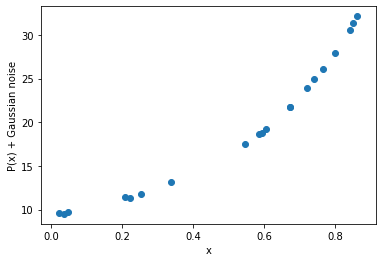

In [290]:
x = np.random.random(20)
y = [P(i) for i in x]

sigma = 1
r = np.random.random(20)
r_gauss = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(r/sigma)**2)

y_noisy = [y[i] + r_gauss[i] for i in range(20)]

plt.scatter(x,y_noisy)
plt.xlabel('x')
plt.ylabel('P(x) + Gaussian noise')

(B)

In [330]:
#A will be equal to x_i^j

A = []

for j in range(9):
    new_list = [x[i]**j for i in range(len(x))]
    A.append(new_list)
A_array = np.asarray(A,float).T
print(np.shape(A_array))

print(A_array)

(20, 9)
[[1.00000000e+00 8.63065407e-01 7.44881896e-01 6.42881797e-01
  5.54849039e-01 4.78871012e-01 4.13297005e-01 3.56702347e-01
  3.07857456e-01]
 [1.00000000e+00 8.00557080e-01 6.40891638e-01 5.13070338e-01
  4.10742092e-01 3.28822489e-01 2.63241172e-01 2.10739584e-01
  1.68709066e-01]
 [1.00000000e+00 5.87005089e-01 3.44574975e-01 2.02267264e-01
  1.18731913e-01 6.96962373e-02 4.09120460e-02 2.40155792e-02
  1.40972672e-02]
 [1.00000000e+00 6.73926162e-01 4.54176471e-01 3.06081406e-01
  2.06276267e-01 1.39014973e-01 9.36858270e-02 6.31373298e-02
  4.25498983e-02]
 [1.00000000e+00 6.06341772e-01 3.67650344e-01 2.22921761e-01
  1.35166775e-01 8.19572621e-02 4.96941115e-02 3.01316156e-02
  1.82700572e-02]
 [1.00000000e+00 7.65590115e-01 5.86128224e-01 4.48733975e-01
  3.43546295e-01 2.63015648e-01 2.01362180e-01 1.54160895e-01
  1.18024057e-01]
 [1.00000000e+00 8.50079637e-01 7.22635389e-01 6.14297629e-01
  5.22201905e-01 4.43913206e-01 3.77361577e-01 3.20787392e-01
  2.72694830e-01

(C)

In [332]:
U,W,VT = np.linalg.svd(A_array,full_matrices=False)

W_inv_vals =[]
for s in W: #creating the W tilda "almost inverse"
    if s == 0:
        W_inv_vals.append(0)
    else:
        W_inv_vals.append(1/s)

W_inv = np.zeros((len(W),len(W)))
for i in range(len(W)):
    W_inv[i,i] = W_inv_vals[i]

V = np.matrix.transpose(VT)
UT = np.matrix.transpose(U)
y = np.asarray(y_noisy)
x = np.dot(V,np.dot(W_inv,np.dot(UT,y_noisy)))
print(x)

[ 9.55674011e+00 -5.30289494e+00  2.58805295e+02 -2.16855108e+03
  9.74611304e+03 -2.40854009e+04  3.31425946e+04 -2.37402497e+04
  6.90326608e+03]


(D)

In [334]:
AT = A_array.T

AA = AT.dot(A_array)
np.shape(AA)
np.dot(linalg.inv(AA),np.dot(AT,y))

array([ 9.55675466e+00, -5.30383262e+00,  2.58824582e+02, -2.16871398e+03,
        9.74680517e+03, -2.40870152e+04,  3.31446950e+04, -2.37416821e+04,
        6.90366490e+03])

Our answer almost exactly matches that from part (C), with slight low order variations